<a href="https://colab.research.google.com/github/Taiba-Naz/Baby-Monitoring-System/blob/main/BMS_1st_part_MobileNet_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet With Keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
def prepare_image(file):
    img_path = '/content/drive/MyDrive/training_bms/baby_sleeping'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


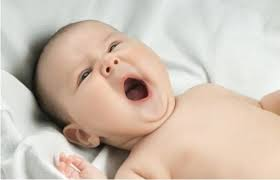

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/training_bms/baby_not_sleeping/20.jpg', width=300,height=200)

In [ ]:
train_path = '/content/drive/MyDrive/training_bms'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 175 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


# Build The Fine-Tuned Model

In [ ]:
#download the MobileNet model, and print a summary of it
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
#output from the sixth to last layer of the model and store it in this variable x
x = mobile.layers[-6].output
x

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [ ]:
output = Dense(units=2, activation='sigmoid')(x)

In [ ]:
#New fine tuned model
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-25]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Train The Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Fit the model

In [ ]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=15,
            verbose=2)

Epoch 1/15
18/18 - 62s - loss: 0.5800 - accuracy: 0.6971 - val_loss: 2.8459 - val_accuracy: 0.5714
Epoch 2/15
18/18 - 1s - loss: 0.1979 - accuracy: 0.9657 - val_loss: 2.4172 - val_accuracy: 0.5714
Epoch 3/15
18/18 - 1s - loss: 0.1351 - accuracy: 0.9657 - val_loss: 1.6625 - val_accuracy: 0.5714
Epoch 4/15
18/18 - 1s - loss: 0.1191 - accuracy: 0.9657 - val_loss: 0.9735 - val_accuracy: 0.5714
Epoch 5/15
18/18 - 1s - loss: 0.0733 - accuracy: 0.9829 - val_loss: 0.5231 - val_accuracy: 0.6234
Epoch 6/15
18/18 - 1s - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.7662
Epoch 7/15
18/18 - 1s - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.3473 - val_accuracy: 0.8701
Epoch 8/15
18/18 - 1s - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.2647 - val_accuracy: 0.9221
Epoch 9/15
18/18 - 1s - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.2120 - val_accuracy: 0.9481
Epoch 10/15
18/18 - 1s - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9351
Epoch 11/15
18/18 

In [ ]:
model.save('BMS_classification.h5')

# Data Augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [ ]:
chosen_image = random.choice(os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping '))

In [ ]:
image_path = '/content/drive/MyDrive/training_bms/baby_sleeping /' + chosen_image

In [ ]:
image = np.expand_dims(plt.imread(image_path),0)

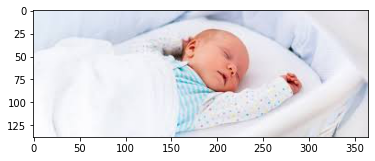

In [ ]:
plt.imshow(image[0])

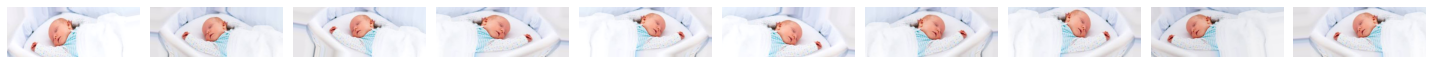

In [ ]:
# we'll generate batches of augmented images from the original image.
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)


# Create batches of augmented images for all images in training directory 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping ')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_sleeping /'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/train_bms_aug/baby_sleeping_aug',save_prefix='aug', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely
          
          

In [ ]:
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_not_sleeping')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_not_sleeping/'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/train_bms_aug/baby_not_sleeping_aug', save_prefix='new', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely


# Training with augmented data

In [ ]:
train_path = '/content/drive/MyDrive/train_bms_aug'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 3362 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [ ]:
3362+77+49

3488

In [ ]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=15,
            verbose=2)

Epoch 1/15
337/337 - 28s - loss: 0.0749 - accuracy: 0.9735 - val_loss: 1.2354 - val_accuracy: 0.6234
Epoch 2/15
337/337 - 19s - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.2399 - val_accuracy: 0.8701
Epoch 3/15
337/337 - 19s - loss: 0.0190 - accuracy: 0.9932 - val_loss: 2.3489 - val_accuracy: 0.5584
Epoch 4/15
337/337 - 18s - loss: 0.0241 - accuracy: 0.9917 - val_loss: 1.2666 - val_accuracy: 0.6623
Epoch 5/15
337/337 - 19s - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.4048 - val_accuracy: 0.8182
Epoch 6/15
337/337 - 19s - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.1258 - val_accuracy: 0.9610
Epoch 7/15
337/337 - 19s - loss: 0.0155 - accuracy: 0.9952 - val_loss: 1.3224 - val_accuracy: 0.6494
Epoch 8/15
337/337 - 18s - loss: 0.0154 - accuracy: 0.9943 - val_loss: 1.1563 - val_accuracy: 0.7143
Epoch 9/15
337/337 - 19s - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.6446 - val_accuracy: 0.8182
Epoch 10/15
337/337 - 19s - loss: 0.0136 - accuracy: 0.9952 - val_loss: 1.4061 - val_accura

In [ ]:
model.save('BMS_classification_augmentation.h5')

# Use The Model For Inference

In [ ]:
test_labels = test_batches.classes

In [ ]:
test_batches.class_indices

{'baby_not_sleeping': 0, 'baby_sleeping': 1}

In [ ]:
from keras.models import load_model
model=load_model('/content/BMS_classification.h5')
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/test_bms/baby_sleeping/1.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result

array([[0.00569282, 0.9013159 ]], dtype=float32)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
predictions[0:5]

array([[0.99568707, 0.02998686],
       [0.9976156 , 0.00266427],
       [0.8312092 , 0.09748837],
       [0.66746604, 0.38774475],
       [0.30203366, 0.61101615]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[36  8]
 [ 5  0]]


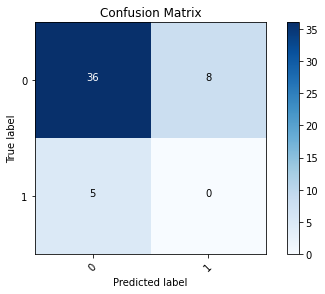

In [ ]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
36/44

0.8181818181818182

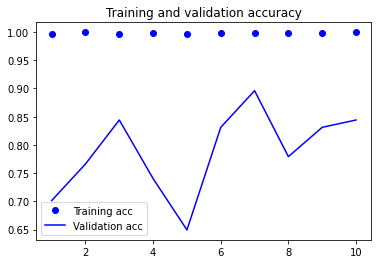

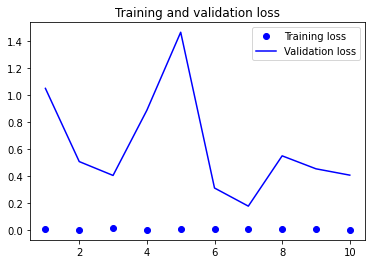

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
test_path='/content/drive/MyDrive/train_bms_aug'
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 3362 images belonging to 2 classes.


In [ ]:
test_labels = test_batches.classes
test_batches.class_indices

{'baby_not_sleeping_aug': 0, 'baby_sleeping_aug': 1}

In [ ]:
from keras.models import load_model
model=load_model('/content/BMS_classification.h5')
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/train_bms_aug/baby_not_sleeping_aug/new_0_1004.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result

array([[0.07904895, 0.895986  ]], dtype=float32)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
predictions[0:5]

array([[0.9995011 , 0.00103507],
       [0.00854973, 0.9917704 ],
       [0.0994797 , 0.9325433 ],
       [0.99804085, 0.00990744],
       [0.9640257 , 0.03150184]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[842 779]
 [897 844]]


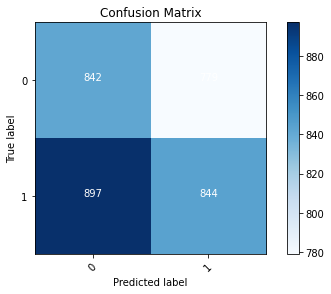

In [ ]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from os import walk
filenames = next(walk('/content/drive/MyDrive/train_bms_aug/baby_not_sleeping_aug'), (None, None, []))[2]
len(filenames)

1621

In [ ]:
#for 0(baby_not_sleeping)
842/1621


0.5194324491054905

In [ ]:
from os import walk
filenames = next(walk('/content/drive/MyDrive/train_bms_aug/baby_sleeping_aug'), (None, None, []))[2]
len(filenames)

1741

In [ ]:
844/1741

0.48477886272257326

In [ ]:
175*20


3500